In [7]:
#important library:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

## load train and test data
# important steps we need:
- augmentation the train and test data for model to avoid the overfitting
- normalize the directories

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define paths to the original training and test directories
train_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training'
test_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing'
val_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation'

# Prepare image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')



Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


- show the images in the train directory:

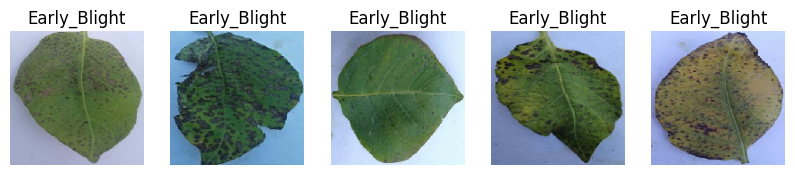

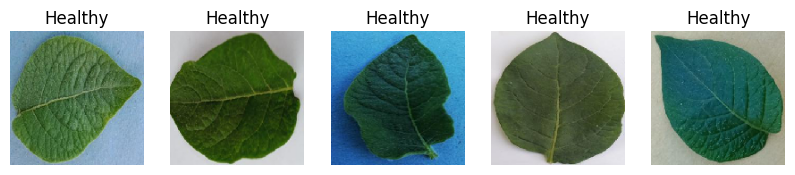

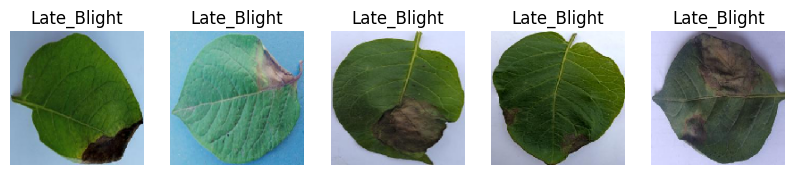

In [9]:
import matplotlib.pyplot as plt

# Define the number of images to plot from each class
num_images_per_class = 5

# Get class indices
class_indices = test_generator.class_indices

# Inverse mapping of class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_index, class_label in class_labels.items():
    # Find the first num_images_per_class images belonging to the current class
    class_images = [image for image, label in zip(train_generator[0][0], train_generator[0][1]) if label[class_index] == 1][:num_images_per_class]

    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(class_images):
        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')
    plt.show()

- show the images in the test directory:

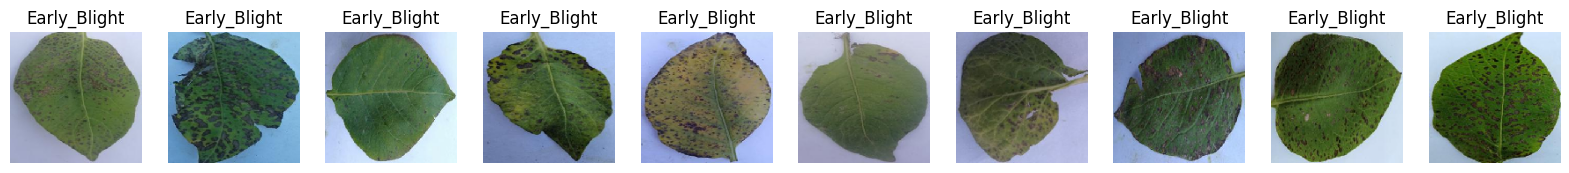

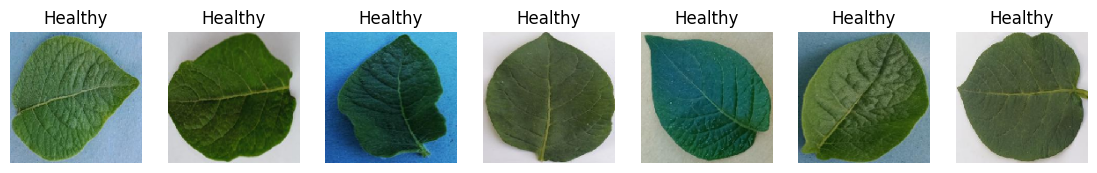

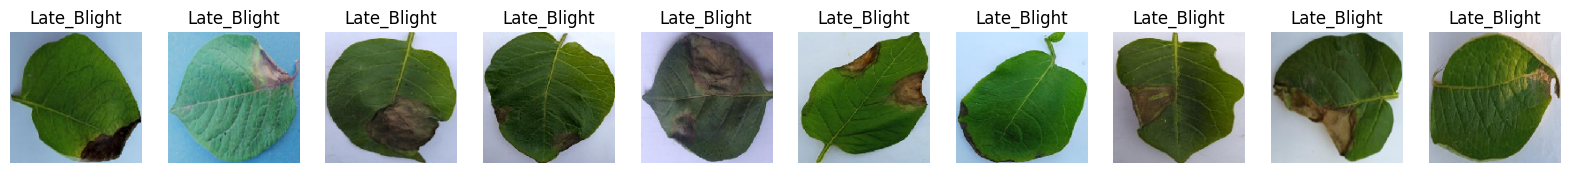

In [10]:
import matplotlib.pyplot as plt

# Define the number of images to plot from each class
num_images_per_class = 10

# Get class indices
class_indices = train_generator.class_indices

class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_index, class_label in class_labels.items():
    # Find the first num_images_per_class images belonging to the current class
    class_images = [image for image, label in zip(train_generator[0][0], train_generator[0][1]) if label[class_index] == 1][:num_images_per_class]

    # Plot the images
    plt.figure(figsize=(20, 10))
    for i, image in enumerate(class_images):
        plt.subplot(1, num_images_per_class, i + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')
    plt.show()


- build the model:

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, BatchNormalization


base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(150, 150, 3), pooling='max')
x = base_model.output
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(3, activation='softmax')(x)  
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)

model = models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- train the model:

In [12]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history1 = model.fit(train_generator, epochs=15, validation_data=validation_generator)



Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.4659 - loss: 2.3343 - val_accuracy: 0.3918 - val_loss: 5.3992
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 246ms/step - accuracy: 0.7982 - loss: 0.5872 - val_accuracy: 0.3918 - val_loss: 4.5077
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 247ms/step - accuracy: 0.8480 - loss: 0.3873 - val_accuracy: 0.3918 - val_loss: 3.3909
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 248ms/step - accuracy: 0.8936 - loss: 0.2851 - val_accuracy: 0.3942 - val_loss: 3.5618
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - accuracy: 0.9308 - loss: 0.1824 - val_accuracy: 0.4159 - val_loss: 3.0927
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 244ms/step - accuracy: 0.9456 - loss: 0.1383 - val_accuracy: 0.5553 - val_loss: 1.7691
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 243ms/step - accuracy: 0.9598 - loss: 0.1186 - val_accuracy: 0.7620 - val_loss: 0.6592
Epoch 8/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9641 - loss: 0.0

- test the trainable model:

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9750 - loss: 0.1240
Test Accuracy: 0.970370352268219


- plot the loss in each epoch

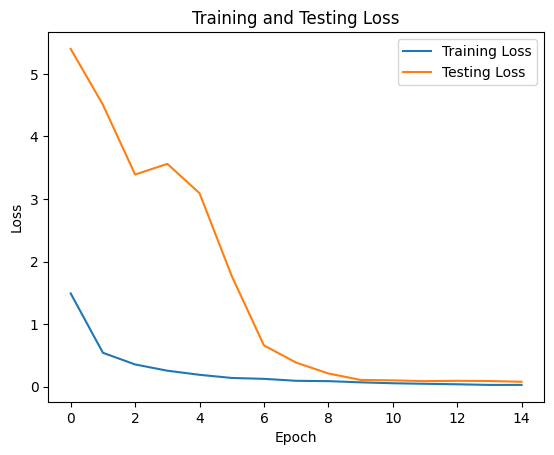

In [36]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()


- plot the accuracy in each epoch

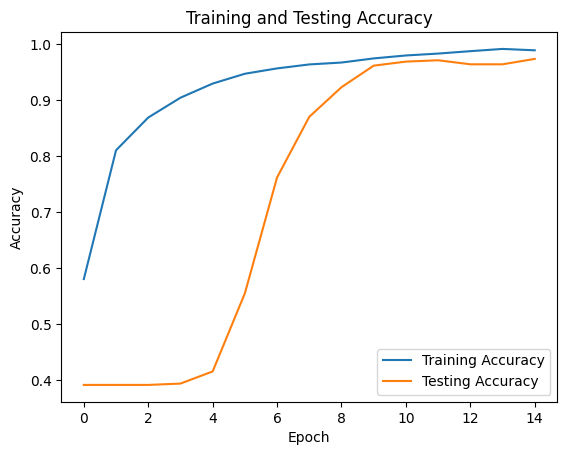

In [37]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

- confusion matric and classification report:

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


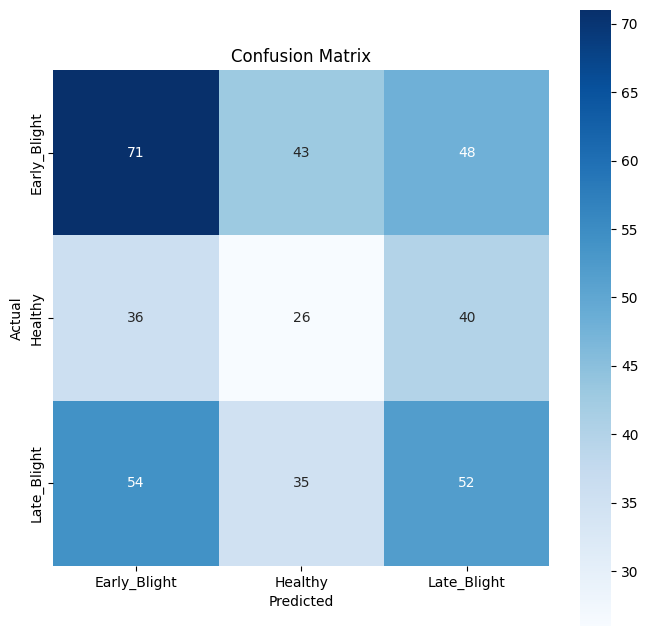

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test data
true_classes = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- plot the confusion matrix
:

In [62]:
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize

# Specify the path to the image file
Late_Blight_path = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing/Healthy/Healthy_33.jpg'

# Read the image using imread
Late_Blight_image = mpimg.imread(Late_Blight_path)

# Normalize the image
Late_Blight_image_normalized = Late_Blight_image / 255.0

# Resize the image to (150, 150)
Late_Blight_image_resized = resize(Late_Blight_image_normalized, (150, 150))

# Reshape the image
Late_Blight_image_reshaped = np.reshape(Late_Blight_image_resized, (1, 150, 150, 3))


In [63]:
predictions = model.predict(Late_Blight_image_reshaped)
print((predictions>0.5).astype("int"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0 1 0]]
